Pose Tahmini başlatılıyor...
🎉 Pose Tahmini Başarılı ve Görselleştirildi!


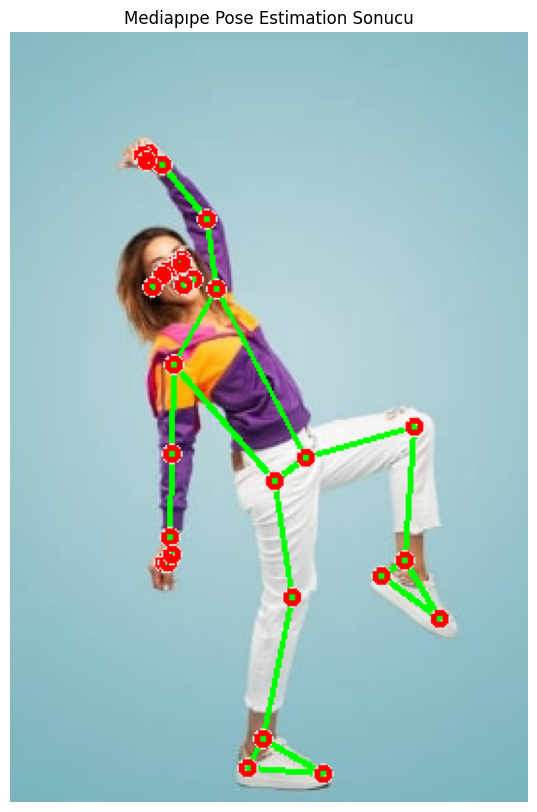

In [1]:
import mediapipe as mp
import cv2
import matplotlib.pyplot as plt
import numpy as np

# Modülleri yükleme
mp_drawing = mp.solutions.drawing_utils
mp_pose = mp.solutions.pose

# --- ⚠️ TEST RESMİNİZİN YOLUNU GÜNCELLEYİN ⚠️ ---
IMAGE_PATH = r"C:\Users\endererkaya\OneDrive\Desktop\MIDTERM\pose-1.jpg"
# -------------------------------------------------

image = cv2.imread(IMAGE_PATH)
if image is None:
    print(f"HATA: Resim {IMAGE_PATH} yolunda bulunamadı. Lütfen yolu kontrol edin.")
else:
    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    # Pose Tahmini Yapma
    with mp_pose.Pose(static_image_mode=True, model_complexity=1) as pose:
        print("Pose Tahmini başlatılıyor...")
        
        results = pose.process(image_rgb)
        annotated_image = image_rgb.copy()

        if results.pose_landmarks:
            mp_drawing.draw_landmarks(
                annotated_image,
                results.pose_landmarks,
                mp_pose.POSE_CONNECTIONS,
                landmark_drawing_spec=mp_drawing.DrawingSpec(color=(255, 0, 0), thickness=2, circle_radius=3),
                connection_drawing_spec=mp_drawing.DrawingSpec(color=(0, 255, 0), thickness=2)
            )
            print("🎉 Pose Tahmini Başarılı ve Görselleştirildi!")
        else:
            print("⚠️ Pose Tahmini Başarısız: İnsan figürü algılanamadı.")

    # Sonucu Gösterme
    plt.figure(figsize=(10, 10))
    plt.imshow(annotated_image)
    plt.title("Mediapıpe Pose Estimation Sonucu")
    plt.axis('off')
    plt.show()